In [2]:
# pip install rasterio geopandas

In [13]:
import geopandas as gpd
import rasterio
from rasterio import mask
from pathlib import Path


In [14]:

def clip_raster(raster_path, shapefile_path, output_dir):
    # Read shapefile
    gdf = gpd.read_file(shapefile_path)

    # Open raster file
    with rasterio.open(raster_path) as src:
        for index, row in gdf.iterrows():
            # Extract the grid name
            grid_name = row['Name']

            # Get the geometry of the feature
            geometry = row['geometry']

            # Use the geometry to create a mask
            mask_geojson = [geometry.__geo_interface__]

            # Clip the raster using the mask
            clipped_data, transform = mask.mask(src, mask_geojson, crop=True)

            # Get metadata for the clipped raster
            metadata = src.meta.copy()
            metadata.update({
                'driver': 'GTiff',
                'height': clipped_data.shape[1],
                'width': clipped_data.shape[2],
                'transform': transform
            })

            # Define the output path for the patch
            output_path = Path(output_dir) / f"{grid_name}_Iowa_2021.tif"

            # Write the clipped data to the output file
            with rasterio.open(output_path, 'w', **metadata) as dst:
                dst.write(clipped_data)

if __name__ == "__main__":
    # Set your raster file path
    raster_path = "CDL_sample_IOWA/clipped_Clip_ProjectRaster.tif"

    # Set your shapefile path
    shapefile_path = "grid_geometries/grid_geometries_Iowa_Project.shp"

    # Set the output directory for the patches
    output_directory = "CDL_Patches_Test"
    # Set your shapefile path

    # Create the output directory if it doesn't exist
    Path(output_directory).mkdir(parents=True, exist_ok=True)

    # Clip the raster into patches
    clip_raster(raster_path, shapefile_path, output_directory)


In [16]:
# pip install matplotlib


In [17]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

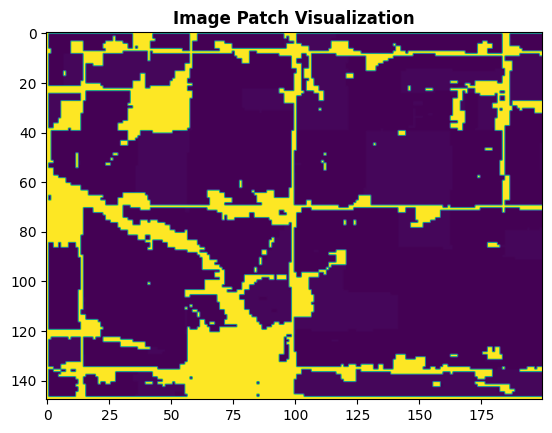

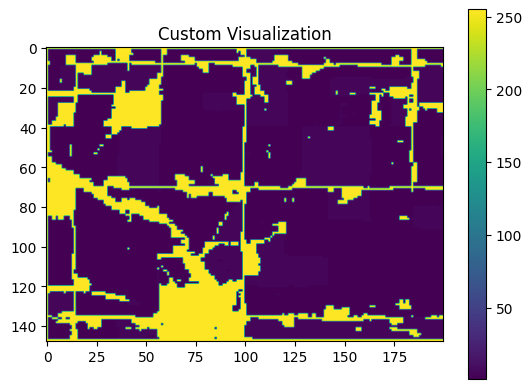

In [20]:


def visualize_image(image_path):
    # Open the image file
    with rasterio.open(image_path) as src:
        # Read the image data
        image_data = src.read()

        # Visualize the image using rasterio's show function
        show(image_data, title="Image Patch Visualization")

        # Show the plot
        plt.show()

        # Alternatively, you can customize the visualization using matplotlib
        # For example, display a specific band or adjust the color map
        # Adjust the band number and cmap as needed
        plt.imshow(image_data[0], cmap='viridis')
        plt.title("Custom Visualization")
        plt.colorbar()
        plt.show()

if __name__ == "__main__":
    # Set the path to one of your output image patches
    image_patch_path = "CDL_Patches_Test/Iowa1006_Iowa_2021.tif"

    # Visualize the image patch
    visualize_image(image_patch_path)
    


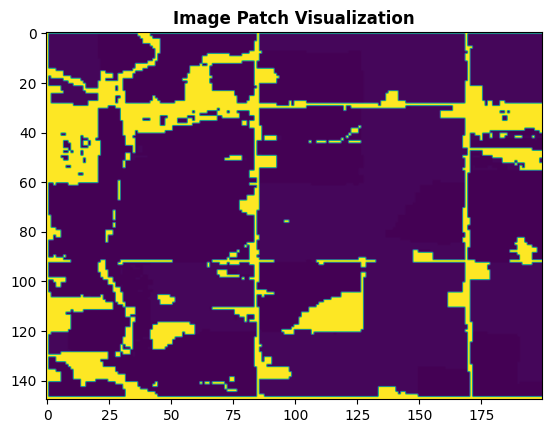

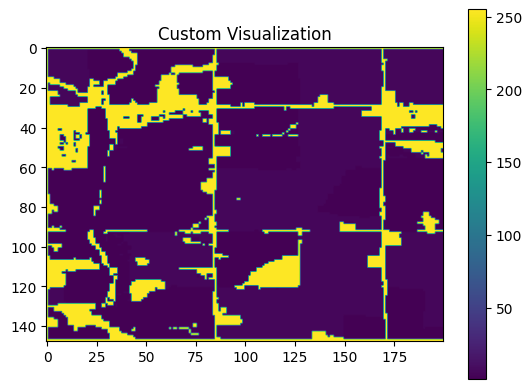

In [23]:
visualize_image("CDL_Patches_Test/Iowa10318_Iowa_2021.tif")

In [25]:
from rasterio.plot import show_hist


Class values for Band 1: {1, 5, 255}


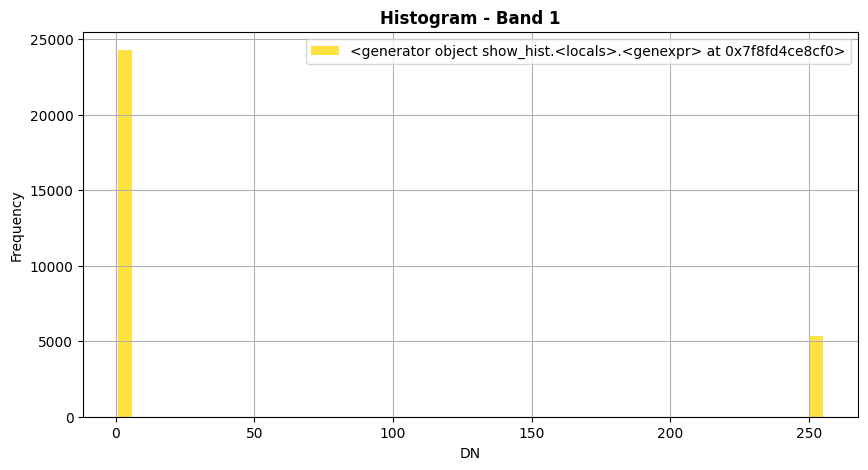

In [26]:

def check_classes_and_visualize(image_path):
    # Open the image file
    with rasterio.open(image_path) as src:
        # Read the image data
        image_data = src.read()

        # Get the number of bands
        num_bands = src.count

        # Display class values and histograms for each band
        for band_num in range(1, num_bands + 1):
            band_data = image_data[band_num - 1]
            print(f"Class values for Band {band_num}: {set(band_data.flatten())}")

            # Plot histogram for each band
            plt.figure(figsize=(10, 5))
            show_hist(band_data, bins=50, title=f"Histogram - Band {band_num}", histtype='stepfilled', lw=2, alpha=0.75)
            plt.show()

        # Visualize the RGB composition of the image (assuming it has at least 3 bands)
        if num_bands >= 3:
            show(image_data, title="RGB Visualization")
            plt.show()

if __name__ == "__main__":
    # Set the path to your raster image
    image_path = "CDL_Patches_Test/Iowa10318_Iowa_2021.tif"

    # Check classes and visualize the image
    check_classes_and_visualize(image_path)
